In [2]:
# Importing Libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pickle import dump
from pickle import load
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [10]:
# Load the data with a different encoding
users_data = pd.read_csv('/content/Users.csv', encoding='latin1')
users_data

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [11]:
# shape of the data
users_data.shape

(278858, 3)

In [12]:
# top 5 rows
users_data.head(20)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [13]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
users_data.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [15]:
users_data.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [16]:
# checking duplicated values
users_data.loc[users_data.duplicated()]

,User-ID,Location,Age


<Axes: >

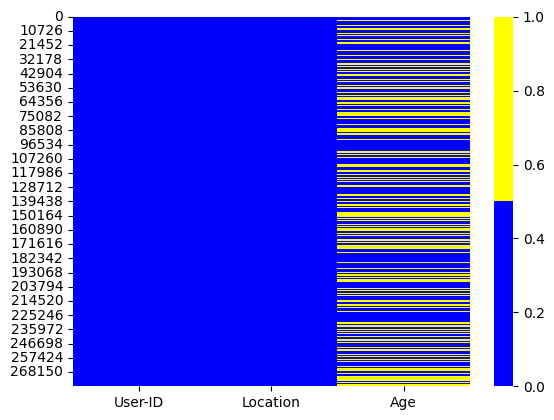

In [17]:
# checking Missing values
import seaborn as sns
cols = users_data.columns
colours = ['blue', 'yellow'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(users_data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [18]:
## checking null values
users_data.loc[users_data['Age'].isnull()]

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
2,3,"moscow, yukon territory, russia",NaN
4,5,"farnborough, hants, united kingdom",NaN
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
...,...,...,...
278849,278850,"sergnano, lombardia, italy",NaN
278853,278854,"portland, oregon, usa",NaN
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [19]:
mean=users_data['Age'].mean()
print(mean)

34.75143370454978


In [20]:
## mwan impuation on null values
users_data['Age'] = users_data['Age'].fillna(users_data['Age'].mean())
users_data.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [21]:
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34.751434
1,2,"stockton, california, usa",18.000000
2,3,"moscow, yukon territory, russia",34.751434
3,4,"porto, v.n.gaia, portugal",17.000000
4,5,"farnborough, hants, united kingdom",34.751434


Outliers

<ipython-input-22-e250d62148de>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users_data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

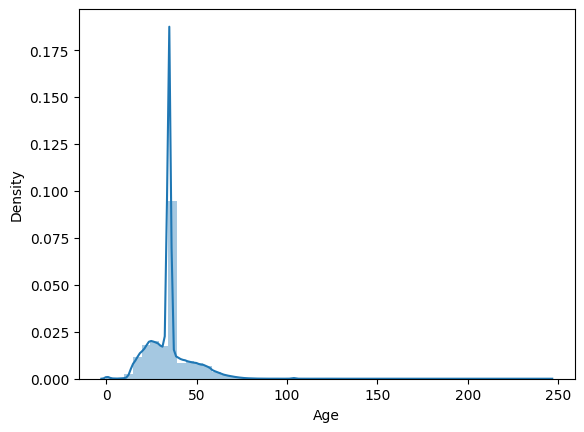

In [22]:
## distplot
sns.distplot(users_data['Age'])

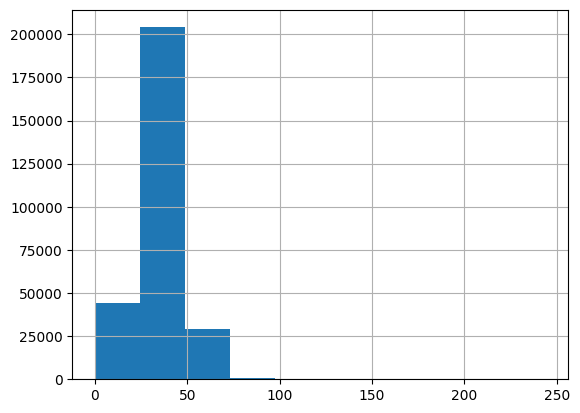

In [23]:
## histogram
users_data['Age'].hist()
plt.show()

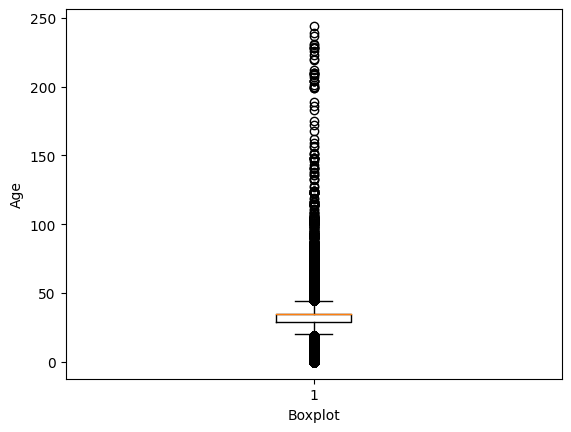

In [24]:
## boxplot
plt.boxplot(users_data['Age'])
plt.xlabel('Boxplot')
plt.ylabel('Age')
plt.show()

In [25]:
## upto age group of 50-60 we have book readers
print(users_data.Location.unique())

['nyc, new york, usa' 'stockton, california, usa'
 'moscow, yukon territory, russia' ... 'sergnano, lombardia, italy'
 'stranraer, n/a, united kingdom' 'tacoma, washington, united kingdom']


In [29]:
## We have very large location database and we cannot interpret from this.
for i in users_data:
    users_data['Country']=users_data.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')
    users_data.Country.nunique()

In [30]:
print(users_data.Country.unique())

['usa' 'russia' 'portugal' 'united kingdom' 'canada' 'spain' 'australia'
 'brazil' '' 'germany' 'mexico' 'china' 'italy' 'distrito federal'
 'france' 'netherlands' 'iraq' 'finland' 'new zealand' 'india' 'ghana'
 'switzerland' 'slovenia' 'iran' 'peru' nan 'vietnam' 'sri lanka'
 'pakistan' 'denmark' 'belgium' 'malaysia' 'turkey' 'philippines' 'greece'
 'colombia' 'norway' 'kuwait' 'chile' 'quit' 'lj' 'taiwan' 'españa'
 'sweden' 'argentina' 'nigeria' 'london' 'bulgaria' 'austria' 'romania'
 'singapore' 'albania' 'egypt' 'tunisia' 'uzbekistan' 'qatar' 'syria'
 'saudi arabia' 'indonesia' 'sudan' 'somewherein space' 'poland'
 'thailand' 'ireland' 'venezuela' 'paraguay' 'mozambique' 'morocco'
 'afghanistan' 'estonia' 'clackamas' 'lesotho' 'yugoslavia' 'slovakia'
 'costa rica' 'basque country' 'ethiopia' 'croatia' 'israel' 'japan'
 'iceland' 'the' 'south africa' 'cuba' 'calabria' 'alderney' 'puerto rico'
 'hong kong' 'latvia' 'jersey' 'luxembourg' 'belarus' 'cape verde'
 'lithuania' 'guyana' '

In [31]:
users_data.drop('Location',axis=1,inplace=True)
users_data.head()

,User-ID,Age,Country
0,1,34.751434,usa
1,2,18.000000,usa
2,3,34.751434,russia
3,4,17.000000,portugal
4,5,34.751434,united kingdom


In [32]:
users_data.isnull().sum()

User-ID      0
Age          0
Country    368
dtype: int64

In [34]:
users_data['Country']=users_data['Country'].astype('str')
a=list(users_data.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

In [35]:
users_data['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)


In [36]:
print(users_data.Country.nunique())

510


Text(0.5, 1.0, 'Count of users Country wise')

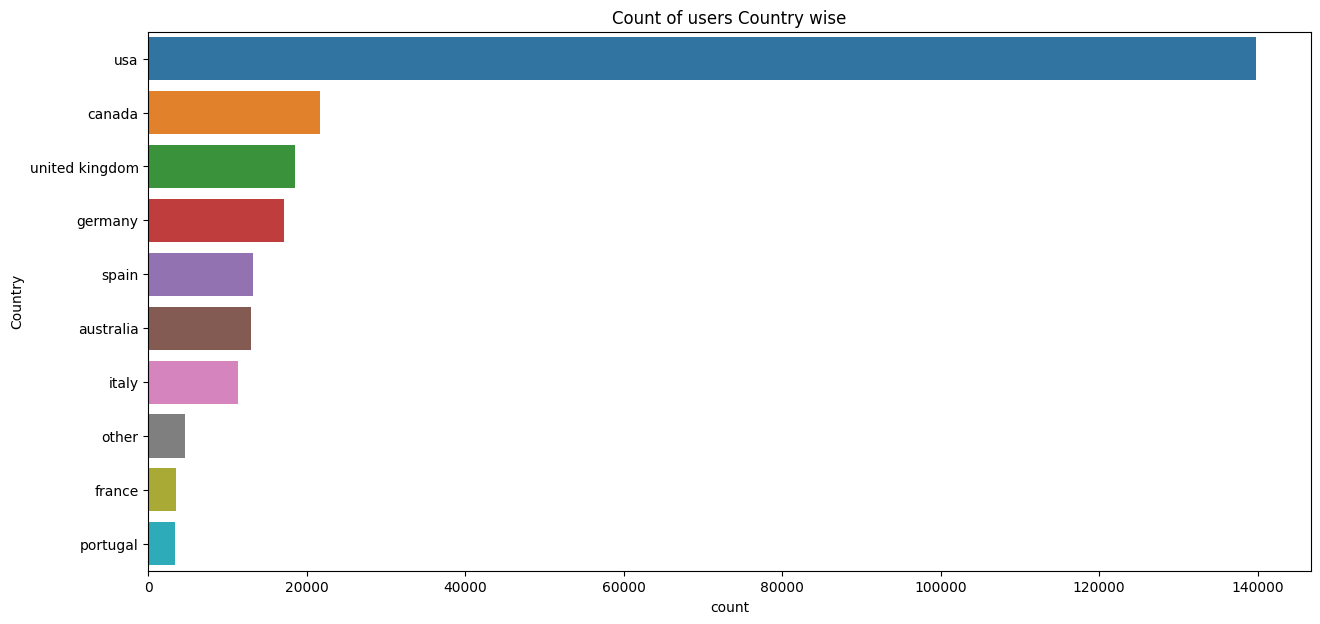

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=users_data,order=pd.value_counts(users_data['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

In [38]:
users_data.isna().sum()

User-ID    0
Age        0
Country    0
dtype: int64

In [44]:
# Load the data with a different encoding
books_data = pd.read_csv('/content/Books.csv', encoding='latin1')
books_data

<ipython-input-44-6fbc6781a7dc>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_data = pd.read_csv('/content/Books.csv', encoding='latin1')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [45]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [46]:
books_data.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [47]:
# checking duplicated values
books_data.loc[books_data.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [48]:
top_books = books_data['Book-Title'].value_counts().head(10)
top_books.index

Index(['Selected Poems', 'Little Women', 'Wuthering Heights',
       'The Secret Garden', 'Dracula', 'Adventures of Huckleberry Finn',
       'Jane Eyre', 'The Night Before Christmas', 'Pride and Prejudice',
       'Great Expectations'],
      dtype='object')

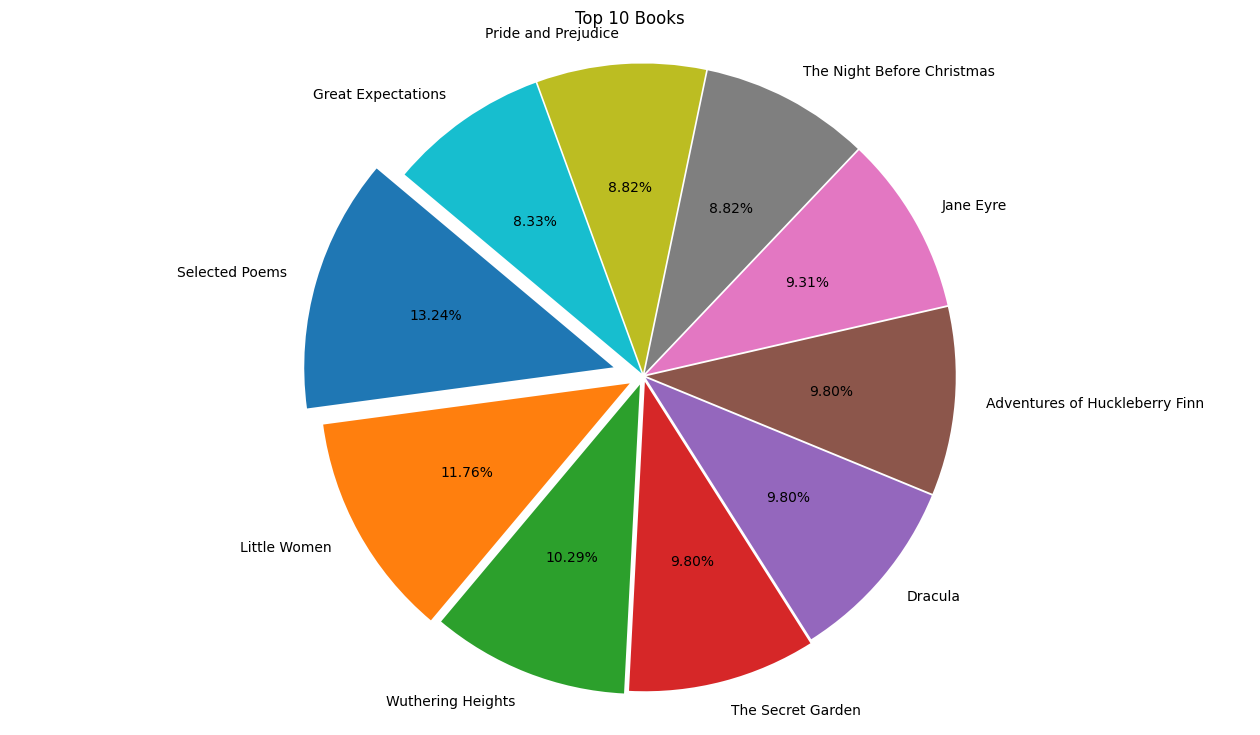

In [50]:
import matplotlib.pyplot as plt

# Your data and other code...

plt.figure(figsize=(16, 9))
plt.pie(top_books,
        labels=top_books.index,
        explode=[0.1, 0.05, 0.03, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
        autopct='%.2f%%',
        startangle=140)  # Adjust startangle as needed

plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Top 10 Books')
plt.show()


In [51]:
books_data['Year-Of-Publication'].value_counts()

2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1924        1
2012        1
1927        1
1931        1
2037        1
Name: Year-Of-Publication, Length: 202, dtype: int64

In [52]:
books_data['Year-Of-Publication'] = pd.to_numeric(books_data['Year-Of-Publication'], errors='coerce')
books_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271359 non-null  object 
 3   Year-Of-Publication  271357 non-null  float64
 4   Publisher            271358 non-null  object 
 5   Image-URL-S          271360 non-null  object 
 6   Image-URL-M          271360 non-null  object 
 7   Image-URL-L          271357 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


Text(0.5, 1.0, 'Top 10 Authors')

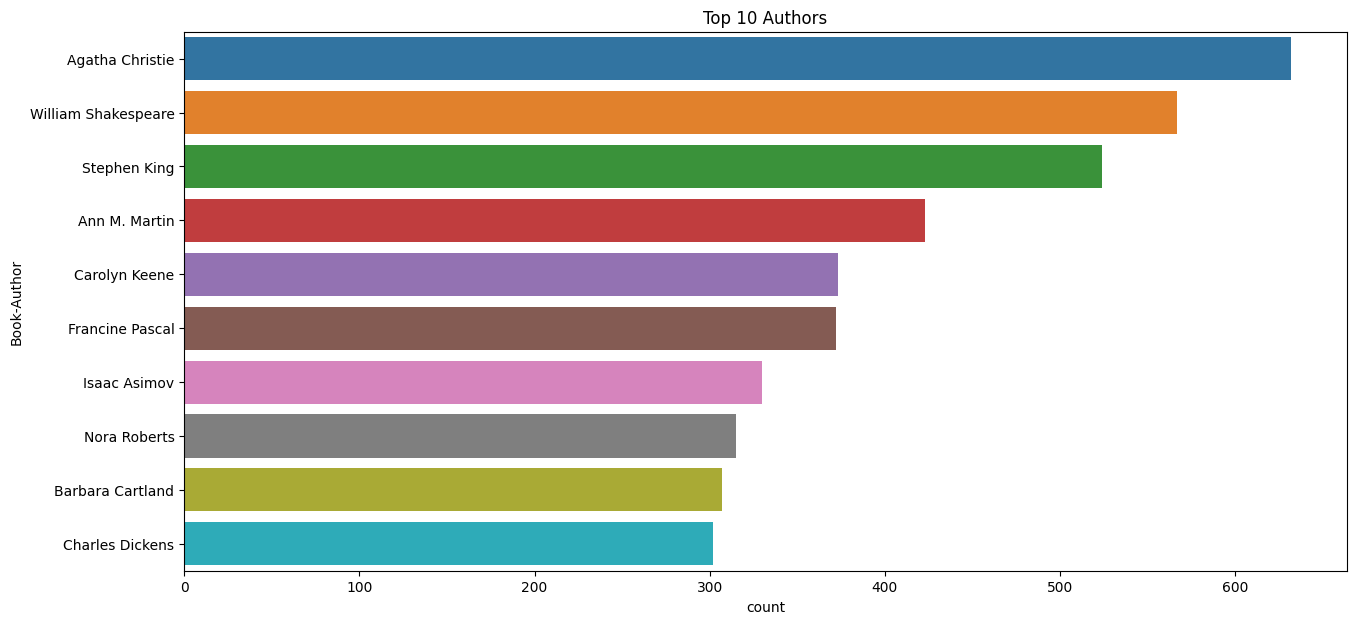

In [53]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book-Author',data=books_data,order=pd.value_counts(books_data['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

Text(0.5, 1.0, 'Top 10 Publishers')

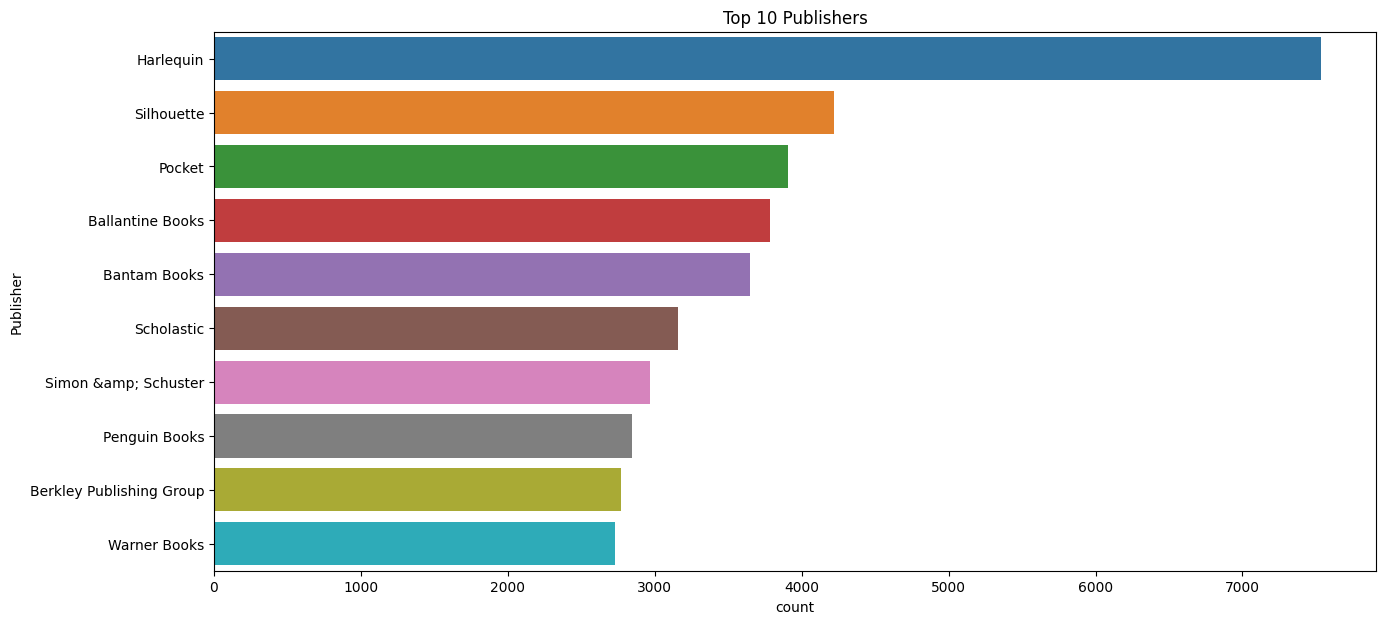

In [54]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=books_data,order=pd.value_counts(books_data['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [55]:
books_data['Year-Of-Publication']=books_data['Year-Of-Publication'].astype('str')
a=list(books_data['Year-Of-Publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['0.0', '1376.0', '1378.0', '1806.0', '1897.0', '1900.0', '1901.0', '1902.0', '1904.0', '1906.0', '1908.0', '1909.0', '1910.0', '1911.0', '1914.0', '1917.0', '1919.0', '1920.0', '1921.0', '1922.0', '1923.0', '1924.0', '1925.0', '1926.0', '1927.0', '1928.0', '1929.0', '1930.0', '1931.0', '1932.0', '1933.0', '1934.0', '1935.0', '1936.0', '1937.0', '1938.0', '1939.0', '1940.0', '1941.0', '1942.0', '1943.0', '1944.0', '1945.0', '1946.0', '1947.0', '1948.0', '1949.0', '1950.0', '1951.0', '1952.0', '1953.0', '1954.0', '1955.0', '1956.0', '1957.0', '1958.0', '1959.0', '1960.0', '1961.0', '1962.0', '1963.0', '1964.0', '1965.0', '1966.0', '1967.0', '1968.0', '1969.0', '1970.0', '1971.0', '1972.0', '1973.0', '1974.0', '1975.0', '1976.0', '1977.0', '1978.0', '1979.0', '1980.0', '1981.0', '1982.0', '1983.0', '1984.0', '1985.0', '1986.0', '1987.0', '1988.0', '1989.0', '1990.0', '1991.0', '1992.0', '1993.0', '1994.0', '1995.0', '1996.0', '1997.0', '1998.0', '1999.0', '2000.0', '2001.0', '2002.0', '2

In [56]:
books_data['Book-Author'].fillna('other',inplace=True)
books_data.loc[books_data.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [57]:
books_data.Publisher.fillna('other',inplace=True)
books_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)
books_data.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [59]:
import pandas as pd
# Load the data with a different encoding
ratings_data = pd.read_csv('/content/Ratings.csv', encoding='latin1')
ratings_data

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [60]:
ratings_data['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

In [61]:
ratings_data['User-ID'].unique().shape

(105283,)

In [62]:
x = ratings_data['User-ID'].value_counts() > 200
x[x]

11676     True
198711    True
153662    True
98391     True
35859     True
          ... 
274808    True
28634     True
59727     True
268622    True
188951    True
Name: User-ID, Length: 899, dtype: bool

In [63]:
y = x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [64]:
ratings_data = ratings_data[ratings_data['User-ID'].isin(y)]
ratings_data

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


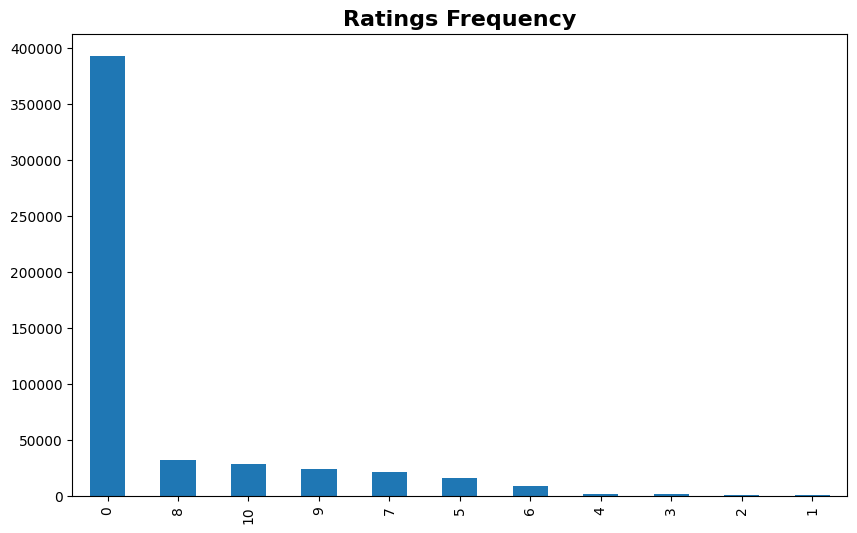

In [65]:
plt.figure(figsize=(10,6), dpi=100)
ratings_data['Book-Rating'].value_counts().plot(kind='bar')
plt.title('Ratings Frequency',  fontsize = 16, fontweight = 'bold')
plt.show()

In [66]:
ratings_data.head()

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [67]:
ratings_with_books = ratings_data.merge(books_data,on = 'ISBN')
ratings_with_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
487666,275970,1892145022,0,Here Is New York,E. B. White,1999.0,Little Bookroom
487667,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002.0,Capital Books (VA)
487668,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993.0,"Bibliographisches Institut, Mannheim"
487669,275970,3829021860,0,The Penis Book,Joseph Cohen,1999.0,Konemann


In [68]:
num_rating = ratings_with_books.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_rating.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [69]:
num_rating.rename(columns={'Book-Rating':'num_of_rating'},inplace=True)
num_rating.head()

,Book-Title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [70]:
final_ratings=ratings_with_books.merge(num_rating,on = 'Book-Title')
final_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82


In [71]:
final_ratings.shape

(487671, 8)

In [73]:
final_ratings = final_ratings[final_ratings['num_of_rating'] > 50]
final_ratings.drop_duplicates(['User-ID','Book-Title'],inplace=True)
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,268110,0743439651,0,Still Waters,Jennifer Lauck,2001.0,Atria,83
228881,127233,0061090956,0,Still Waters,Kerry Tucker,1992.0,Harper Mass Market Paperbacks (Mm),83
228882,262399,0061090956,0,Still Waters,Kerry Tucker,1992.0,Harper Mass Market Paperbacks (Mm),83
228883,178667,074350996X,0,Still Waters,Jennifer Lauck,2001.0,Simon &amp; Schuster Audio,83


In [74]:
final_ratings = final_ratings.rename({'User-ID' : 'userid','Book-Title' : 'booktitle','Book-Rating' : 'bookrating'},axis=1)
final_ratings.drop_duplicates(['userid','booktitle'],inplace=True)
final_ratings

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
228880,268110,0743439651,0,Still Waters,Jennifer Lauck,2001.0,Atria,83
228881,127233,0061090956,0,Still Waters,Kerry Tucker,1992.0,Harper Mass Market Paperbacks (Mm),83
228882,262399,0061090956,0,Still Waters,Kerry Tucker,1992.0,Harper Mass Market Paperbacks (Mm),83
228883,178667,074350996X,0,Still Waters,Jennifer Lauck,2001.0,Simon &amp; Schuster Audio,83


In [75]:
pivot_table = final_ratings.pivot_table(index='userid',
                                 columns='booktitle',
                                 values='bookrating')

In [76]:
pivot_table

booktitle,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
userid,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,0.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
277427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
pivot_table.fillna(0, inplace=True)
pivot_table

booktitle,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
userid,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [79]:
user_sim = 1 - pairwise_distances(pivot_table.values,metric='cosine')
user_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.12370028, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12370028, 1.        , ..., 0.        , 0.        ,
        0.06275062],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.06275062, ..., 0.        , 0.        ,
        1.        ]])

In [80]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [81]:
user_sim_df.index = final_ratings.userid.unique()
user_sim_df.columns = final_ratings.userid.unique()
user_sim_df

,277427,3363,11676,12538,13552,16795,24194,25981,26535,28204,...,154176,89192,222488,79441,35433,133868,178950,142454,133567,193560
277427,1.000000,0.0000,0.000000,0.118987,0.0,0.217181,0.000000,0.000000,0.000000,0.224303,...,0.000000,0.047233,0.000000,0.069710,0.000000,0.161964,0.000000,0.0,0.0,0.000000
3363,0.000000,1.0000,0.123700,0.000000,0.0,0.000000,0.000000,0.343401,0.000000,0.000000,...,0.141434,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
11676,0.000000,0.1237,1.000000,0.000000,0.0,0.000000,0.141974,0.000000,0.103477,0.000000,...,0.115359,0.000000,0.039213,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.062751
12538,0.118987,0.0000,0.000000,1.000000,0.0,0.000000,0.060874,0.000000,0.085486,0.095726,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
13552,0.000000,0.0000,0.000000,0.000000,1.0,0.000000,0.139347,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.349642,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133868,0.161964,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.053654,...,0.000000,0.000000,0.000000,0.074573,0.000000,1.000000,0.064469,0.0,0.0,0.000000
178950,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.048560,0.000000,0.000000,0.078608,...,0.058962,0.000000,0.044451,0.123130,0.000000,0.064469,1.000000,0.0,0.0,0.000000
142454,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000
133567,0.000000,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000


In [82]:
user_sim_df.iloc[0:15, 0:15]

,277427,3363,11676,12538,13552,16795,24194,25981,26535,28204,30533,31826,41084,43246,44728
277427,1.000000,0.000000,0.000000,0.118987,0.000000,0.217181,0.000000,0.000000,0.000000,0.224303,0.000000,0.070808,0.120101,0.064262,0.000000
3363,0.000000,1.000000,0.123700,0.000000,0.000000,0.000000,0.000000,0.343401,0.000000,0.000000,0.000000,0.000000,0.000000,0.022211,0.000000
11676,0.000000,0.123700,1.000000,0.000000,0.000000,0.000000,0.141974,0.000000,0.103477,0.000000,0.119341,0.056830,0.000000,0.051328,0.000000
12538,0.118987,0.000000,0.000000,1.000000,0.000000,0.000000,0.060874,0.000000,0.085486,0.095726,0.000000,0.000000,0.024823,0.069928,0.000000
13552,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.139347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101633,0.160904
16795,0.217181,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24194,0.000000,0.000000,0.141974,0.060874,0.139347,0.000000,1.000000,0.000000,0.254876,0.071846,0.000000,0.045644,0.031672,0.094887,0.095291
25981,0.000000,0.343401,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26535,0.000000,0.000000,0.103477,0.085486,0.000000,0.000000,0.254876,0.000000,1.000000,0.082363,0.000000,0.107396,0.057361,0.249110,0.000000
28204,0.224303,0.000000,0.000000,0.095726,0.000000,0.000000,0.071846,0.000000,0.082363,1.000000,0.000000,0.185045,0.163777,0.182585,0.000000


In [83]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:15, 0:15]

,277427,3363,11676,12538,13552,16795,24194,25981,26535,28204,30533,31826,41084,43246,44728
277427,0.000000,0.000000,0.000000,0.118987,0.000000,0.217181,0.000000,0.000000,0.000000,0.224303,0.000000,0.070808,0.120101,0.064262,0.000000
3363,0.000000,0.000000,0.123700,0.000000,0.000000,0.000000,0.000000,0.343401,0.000000,0.000000,0.000000,0.000000,0.000000,0.022211,0.000000
11676,0.000000,0.123700,0.000000,0.000000,0.000000,0.000000,0.141974,0.000000,0.103477,0.000000,0.119341,0.056830,0.000000,0.051328,0.000000
12538,0.118987,0.000000,0.000000,0.000000,0.000000,0.000000,0.060874,0.000000,0.085486,0.095726,0.000000,0.000000,0.024823,0.069928,0.000000
13552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.139347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101633,0.160904
16795,0.217181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24194,0.000000,0.000000,0.141974,0.060874,0.139347,0.000000,0.000000,0.000000,0.254876,0.071846,0.000000,0.045644,0.031672,0.094887,0.095291
25981,0.000000,0.343401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
26535,0.000000,0.000000,0.103477,0.085486,0.000000,0.000000,0.254876,0.000000,0.000000,0.082363,0.000000,0.107396,0.057361,0.249110,0.000000
28204,0.224303,0.000000,0.000000,0.095726,0.000000,0.000000,0.071846,0.000000,0.082363,0.000000,0.000000,0.185045,0.163777,0.182585,0.000000


In [84]:
user_sim_df.loc[16795,175886]

0.0

In [85]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:15]

277427     43806
3363       25981
11676     143792
12538      51450
13552     183995
16795      94242
24194     225810
25981     208568
26535     114368
28204      31846
30533     129008
31826     163973
41084     181176
43246     217106
44728     169233
dtype: int64

In [86]:
user_sim_df.sort_values((44728),ascending=False).iloc[0:5,0:15]

,277427,3363,11676,12538,13552,16795,24194,25981,26535,28204,30533,31826,41084,43246,44728
123625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284440
169233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284440
95316,0.000000,0.000000,0.092528,0.000000,0.182079,0.000000,0.065243,0.0,0.000000,0.000000,0.000000,0.058905,0.034487,0.060142,0.268907
164533,0.038204,0.000000,0.000000,0.000000,0.000000,0.095905,0.000000,0.0,0.000000,0.024916,0.000000,0.035735,0.092054,0.054728,0.268375
170518,0.094703,0.037377,0.111148,0.098925,0.059202,0.064253,0.103121,0.0,0.118511,0.096342,0.062006,0.130179,0.146240,0.170542,0.229514


In [87]:
final_ratings[(final_ratings['userid']==13552)|(final_ratings['userid']==183995)].head(10)

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
50,183995,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
511,13552,0061009059,0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,108
1274,13552,0670032379,0,The Secret Life of Bees,Sue Monk Kidd,2002.0,Viking Books,209
1426,13552,0312966091,0,Three To Get Deadly : A Stephanie Plum Novel (...,Janet Evanovich,1998.0,St. Martin's Paperbacks,105
1640,13552,0316096199,0,Lucky : A Memoir,Alice Sebold,2002.0,Back Bay Books,115
1807,13552,0316284955,0,White Oleander : A Novel (Oprah's Book Club),Janet Fitch,2000.0,Back Bay Books,114
1923,13552,0316569321,0,White Oleander : A Novel,Janet Fitch,1999.0,"Little, Brown",116
2929,183995,0345361792,0,A Prayer for Owen Meany,John Irving,1990.0,Ballantine Books,137
3686,13552,0380710218,8,Postmortem,Patricia Daniels Cornwell,1993.0,Harper Mass Market Paperbacks (Mm),78


In [88]:
user1=final_ratings[(final_ratings['userid']==13552)]
user1

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
511,13552,0061009059,0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,108
1274,13552,0670032379,0,The Secret Life of Bees,Sue Monk Kidd,2002.0,Viking Books,209
1426,13552,0312966091,0,Three To Get Deadly : A Stephanie Plum Novel (...,Janet Evanovich,1998.0,St. Martin's Paperbacks,105
1640,13552,0316096199,0,Lucky : A Memoir,Alice Sebold,2002.0,Back Bay Books,115
...,...,...,...,...,...,...,...,...
182967,13552,0553569910,0,The Ugly Duckling,Iris Johansen,1997.0,Bantam Books,65
183579,13552,0553581554,0,The Killing Game: Only One Can Win...and the L...,Iris Johansen,2000.0,Bantam Books,53
186033,13552,0671027387,0,Deception Point,Dan Brown,2002.0,Pocket,69
206613,13552,0451186362,0,Rose Madder,Stephen King,2004.0,Signet Book,81


In [89]:
user2=final_ratings[(final_ratings['userid']==183995)]
user2

,userid,ISBN,bookrating,booktitle,Book-Author,Year-Of-Publication,Publisher,num_of_rating
50,183995,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82
2929,183995,0345361792,0,A Prayer for Owen Meany,John Irving,1990.0,Ballantine Books,137
4231,183995,0385484518,10,"Tuesdays with Morrie: An Old Man, a Young Man,...",MITCH ALBOM,1997.0,Doubleday,142
7435,183995,0440225701,0,The Street Lawyer,JOHN GRISHAM,1999.0,Dell,186
11980,183995,0679731148,0,A Year in Provence,Peter Mayle,1991.0,Vintage Books USA,51
17317,183995,080410526X,0,All I Really Need to Know,ROBERT FULGHUM,1989.0,Ivy Books,127
19016,183995,0440211727,0,A Time to Kill,JOHN GRISHAM,1992.0,Dell,210
19489,183995,0440214041,0,The Pelican Brief,John Grisham,1993.0,Dell,236
25814,183995,0345380371,5,Rising Sun,MICHAEL CRICHTON,1992.0,Ballantine Books,112
31276,183995,038550120X,0,A Painted House,JOHN GRISHAM,2001.0,Doubleday,228


In [90]:
pd.merge(user1,user2,on='booktitle',how='outer')

,userid_x,ISBN_x,bookrating_x,booktitle,Book-Author_x,Year-Of-Publication_x,Publisher_x,num_of_rating_x,userid_y,ISBN_y,bookrating_y,Book-Author_y,Year-Of-Publication_y,Publisher_y,num_of_rating_y
0,13552.0,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82.0,183995.0,002542730X,10.0,James Finn Garner,1994.0,John Wiley &amp; Sons Inc,82.0
1,13552.0,0061009059,0.0,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995.0,HarperTorch,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13552.0,0670032379,0.0,The Secret Life of Bees,Sue Monk Kidd,2002.0,Viking Books,209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13552.0,0312966091,0.0,Three To Get Deadly : A Stephanie Plum Novel (...,Janet Evanovich,1998.0,St. Martin's Paperbacks,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13552.0,0316096199,0.0,Lucky : A Memoir,Alice Sebold,2002.0,Back Bay Books,115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,NaN,NaN,NaN,Unnatural Exposure,NaN,NaN,NaN,NaN,183995.0,0399142851,0.0,Patricia Daniels Cornwell,1997.0,Putnam Pub Group,91.0
198,NaN,NaN,NaN,1st to Die: A Novel,NaN,NaN,NaN,NaN,183995.0,0316666009,8.0,James Patterson,2001.0,Little Brown and Company,162.0
199,NaN,NaN,NaN,The Celestine Prophecy (Celestine Prophecy),NaN,NaN,NaN,NaN,183995.0,044651862X,0.0,James Redfield,1994.0,Warner Books,63.0
200,NaN,NaN,NaN,Dances With Wolves,NaN,NaN,NaN,NaN,183995.0,0449134482,0.0,Michael Blake,1990.0,Fawcett Books,66.0


In [91]:
book_read_by_user1 = list(set(user1['booktitle']))
book_read_by_user2 = list(set(user2['booktitle']))

for book_name in book_read_by_user1:
  if book_name not in book_read_by_user2:
    print("Recommendation : ", book_name)

Recommendation :  Faking It
Recommendation :  Five Days in Paris
Recommendation :  No Greater Love
Recommendation :  Welcome to Temptation
Recommendation :  Point of Origin
Recommendation :  Rising Tides
Recommendation :  The Horse Whisperer
Recommendation :  Welcome to the World, Baby Girl!
Recommendation :  The Bachelor (Warner Books Contemporary Romance)
Recommendation :  Three To Get Deadly : A Stephanie Plum Novel (A Stephanie Plum Novel)
Recommendation :  Lightning
Recommendation :  What Looks Like Crazy On An Ordinary Day
Recommendation :  SHIPPING NEWS
Recommendation :  Fast Women
Recommendation :  The Diary of Ellen Rimbauer: My Life at Rose Red
Recommendation :  Mr. Murder
Recommendation :  The Promise
Recommendation :  The Secret Life of Bees
Recommendation :  Accident
Recommendation :  The Kiss
Recommendation :  Watchers
Recommendation :  Christine
Recommendation :  The Testament
Recommendation :  Gerald's Game
Recommendation :  The Cider House Rules
Recommendation :  Fried

In [92]:
book_read_by_user1 = list(set(user1['booktitle']))
book_read_by_user2 = list(set(user2['booktitle']))

for book_name in book_read_by_user2:
  if book_name not in book_read_by_user1:
    print("Recommendation : ", book_name)         #books recommended to user1

Recommendation :  Master of the Game
Recommendation :  It Was on Fire When I Lay Down on It
Recommendation :  Dances With Wolves
Recommendation :  A Is for Alibi (Kinsey Millhone Mysteries (Paperback))
Recommendation :  Brave New World
Recommendation :  1st to Die: A Novel
Recommendation :  Rising Sun
Recommendation :  The Celestine Prophecy (Celestine Prophecy)
Recommendation :  A Year in Provence
Recommendation :  Nothing Lasts Forever
Recommendation :  Stupid White Men ...and Other Sorry Excuses for the State of the Nation!
Recommendation :  Executive Orders (Jack Ryan Novels)
Recommendation :  L Is for Lawless
Recommendation :  A Prayer for Owen Meany
Recommendation :  The General's Daughter
Recommendation :  Big Trouble
Recommendation :  F Is for Fugitive (Kinsey Millhone Mysteries (Paperback))
Recommendation :  Fatherhood
Recommendation :  Unnatural Exposure


In [93]:
top_n = 5
most_similar_users_ids = {}
for user_id_val in user_sim_df.columns:
    # Sort the user IDs by similarity score in descending order
    similar_ids = user_sim_df[user_id_val].sort_values(ascending=False).index.tolist()
    # Remove the user's own ID from the list
    similar_ids.remove(user_id_val)
    # Store the top N  similar user IDs in the dictionary
    most_similar_users_ids[user_id_val] = similar_ids[:top_n]
most_similar_users_ids

{277427: [43806, 31846, 107951, 30972, 181176],
 3363: [25981, 249111, 258690, 235935, 263877],
 11676: [143792, 159376, 92547, 187145, 225199],
 12538: [51450, 75591, 144131, 8245, 129716],
 13552: [183995, 242006, 35433, 224646, 149934],
 16795: [94242, 40943, 137589, 63938, 59172],
 24194: [225810, 52203, 75860, 114368, 26535],
 25981: [208568, 3363, 238961, 260183, 16106],
 26535: [114368, 82893, 259380, 24194, 43246],
 28204: [31846, 190807, 92652, 92853, 195694],
 30533: [129008, 229011, 154176, 143792, 204591],
 31826: [163973, 265595, 100644, 174304, 6543],
 41084: [181176, 195694, 252071, 164828, 250184],
 43246: [217106, 6543, 26535, 39773, 52584],
 44728: [123625, 169233, 95316, 164533, 170518],
 51883: [12982, 252848, 249894, 231857, 209516],
 52584: [197659, 88733, 43246, 110214, 136010],
 55548: [96448, 177090, 170513, 238864, 29855],
 60244: [265115, 178199, 101851, 94853, 130554],
 71712: [139742, 228764, 8245, 217740, 225810],
 77809: [169663, 224349, 269890, 62895, 94

In [94]:
import pandas as pd
def get_top_n_similar_users(userid, topn=5):
    # Sort the user IDs by similarity score in descending order
    similar_ids = user_sim_df[userid].sort_values(ascending=False).index.tolist()
    # Remove the user's own ID from the list
    similar_ids.remove(userid)
    # Return the top N similar user IDs
    return similar_ids[:topn]

# Usage example
userid = 26535  # Replace with the specific user ID you're interested in
topn = 5  # Replace with the desired number of similar users
similar_users = get_top_n_similar_users(userid, topn)
print("Top", topn, "similar users for user", userid, ":", similar_users)


Top 5 similar users for user 26535 : [114368, 82893, 259380, 24194, 43246]


In [95]:
def get_top_rated_books_for_user(userid, topn=5):
    # Filter the final_ratings DataFrame for the given user
    user_ratings = final_ratings[final_ratings['userid'] == userid]

    # Sort the user's ratings by book rating in descending order
    user_top_rated_books = user_ratings.sort_values(by='bookrating', ascending=False).head()

    return user_top_rated_books
# Usage example
userid = 43806  # Replace with the specific user ID you're interested in
topn = 5  # Replace with the desired number of top-rated books

users_top_rated_books = get_top_rated_books_for_user(userid, topn)

print("Users Top", topn, "rated books for user", userid, ":")
print(users_top_rated_books)

Users Top 5 rated books for user 43806 :
        userid        ISBN  bookrating  \
115412   43806  0671004530          10   
29719    43806  038039586X          10   
143811   43806  0440200989          10   
54731    43806  043935806X          10   
133699   43806  0451169514          10   

                                                booktitle  \
115412                       On the Street Where You Live   
29719                                      Watership Down   
143811                               Weep No More My Lady   
54731   Harry Potter and the Order of the Phoenix (Boo...   
133699                                                 It   

                 Book-Author Year-Of-Publication      Publisher  num_of_rating  
115412    Mary Higgins Clark              2002.0         Pocket             69  
29719   Richard George Adams              1975.0  Harpercollins            115  
143811    Mary Higgins Clark              1993.0           Dell             53  
54731          

In [99]:
def recommend_books_to_user(userid, topn=10):
    # Get the most similar users
    similar_users = get_top_n_similar_users(userid, topn=10)

    recommended_books = []

    for sim_user in similar_users:
        # Filter books rated by the similar user
        sim_user_ratings = final_ratings[final_ratings['userid'] == sim_user]

        # Find the top-rated book by the similar user
        top_rated_book = sim_user_ratings.sort_values(by='bookrating', ascending=False).head(1)

        top_rated_book_title = top_rated_book['booktitle'].values[0]

        # Check if the user has not already rated the book
        if top_rated_book_title not in final_ratings[final_ratings['userid'] == userid]['booktitle'].values:
            recommended_books.append(top_rated_book_title)

    return recommended_books

# Usage example
userid = 12538  # Replace with the specific user ID you're interested in
top_n = 10  # Replace with the desired number of book recommendations
recommended_books = recommend_books_to_user(userid, topn=10)
print("Book recommendations for user", userid, ":", recommended_books)


Book recommendations for user 12538 : ['Dying for Chocolate (Culinary Mysteries (Paperback))', "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))", 'Girl with a Pearl Earring', 'A Wrinkle in Time', 'We Were the Mulvaneys', 'Seabiscuit']


In [100]:
recommend_books_to_user(3363)

['Dolores Claiborne',
 'Cradle and All',
 'The Mists of Avalon',
 'The Secret Life of Bees',
 'While I Was Gone',
 'Lucky Man: A Memoir',
 'I Capture the Castle',
 "I Know This Much Is True (Oprah's Book Club)",
 'Harry Potter and the Goblet of Fire (Book 4)']

In [101]:
import pickle
from pickle import dump
from pickle import load
pickle.dump(final_ratings,open('final_ratings.pkl','wb'))
pickle.dump(pivot_table,open('pivot_table.pkl','wb'))
pickle.dump(user_sim_df,open('usd.pkl','wb'))